<a href="https://colab.research.google.com/github/Edenshmuel/PapaJohns_Data_Science_Project/blob/Nadav/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
# ◊î◊ì◊§◊°◊™ ◊õ◊ú ◊î◊ß◊ë◊¶◊ô◊ù ◊ë◊™◊ô◊ß◊ô◊ô◊î (◊©◊ô◊û◊ô ◊ê◊™ ◊î◊†◊™◊ô◊ë ◊î◊ê◊û◊ô◊™◊ô ◊õ◊ê◊ü)
folder_path = '/content/drive/MyDrive/Final_Progect_PapaJohns'
files = os.listdir(folder_path)
print(files)

['2024_combined.csv', '2022_combined.csv', '2023_combined.csv', 'Files']


In [4]:
import os
import re
from collections import defaultdict

folder_path = '/content/drive/MyDrive/Final_Progect_PapaJohns/Files'
files = os.listdir(folder_path)

# ◊û◊ô◊ú◊ï◊ü ◊©◊ô◊ß◊ë◊• ◊ß◊ë◊¶◊ô◊ù ◊ú◊§◊ô ◊©◊†◊î
files_by_year = defaultdict(list)

# ◊†◊ô◊™◊ï◊ó ◊õ◊ú ◊©◊ù ◊ß◊ï◊ë◊•
for file in files:
    # ◊ó◊ô◊§◊ï◊© ◊©◊ú ◊®◊¶◊£ ◊û◊°◊§◊®◊ô◊ù ◊©◊ú 4 ◊°◊§◊®◊ï◊™ (◊©◊†◊î)
    match = re.search(r'20\d{2}', file)
    if match:
        year = match.group()
        files_by_year[year].append(file)
    else:
        files_by_year['◊ú◊ê ◊ñ◊ï◊î◊™◊î ◊©◊†◊î'].append(file)

# ◊î◊ì◊§◊°◊î ◊©◊ú ◊î◊™◊ï◊¶◊ê◊î
for year, file_list in files_by_year.items():
    print(f"◊©◊†◊î: {year}")
    for f in file_list:
        print(f"  - {f}")

◊©◊†◊î: 2023
  - ◊ê◊§◊®◊ô◊ú-◊ê◊ï◊í◊ï◊°◊ò_2023.xlsx
  - ◊ô◊†◊ï◊ê◊®-◊ê◊§◊®◊ô◊ú_2023.xlsx
  - ◊ê◊ï◊í◊ï◊°◊ò-◊ì◊¶◊û◊ë◊®_2023.csv
◊©◊†◊î: 2024
  - Combined_Data2024.csv
◊©◊†◊î: 2022
  - ◊ô◊ï◊†◊ô-◊ì◊¶◊û◊ë◊®_2022.csv
  - ◊ô◊†◊ï◊ê◊®-◊§◊ë◊®◊ï◊ê◊®_2022.csv
  - ◊§◊ë◊®◊ï◊ê◊®-◊ô◊ï◊†◊ô_2022.csv


In [5]:
import os
import re
import pandas as pd
from collections import defaultdict

# ◊†◊™◊ô◊ë ◊ú◊ß◊ë◊¶◊ô◊ù
input_folder = '/content/drive/MyDrive/Final_Progect_PapaJohns/Files'
output_folder = '/content/drive/MyDrive/Final_Progect_PapaJohns'

files = os.listdir(input_folder)

# ◊ß◊ô◊ë◊ï◊• ◊ú◊§◊ô ◊©◊†◊î
files_by_year = defaultdict(list)
for file in files:
    match = re.search(r'20\d{2}', file)
    if match:
        year = match.group()
        files_by_year[year].append(file)

# ◊ê◊ô◊ó◊ï◊ì ◊ú◊§◊ô ◊©◊†◊î
for year, file_list in files_by_year.items():
    df_list = []
    for file in file_list:
        file_path = os.path.join(input_folder, file)
        try:
            if file.endswith('.csv'):
                try:
                    df = pd.read_csv(file_path)
                except UnicodeDecodeError:
                    df = pd.read_csv(file_path, encoding='cp1255')
            elif file.endswith('.xlsx'):
                df = pd.read_excel(file_path)
            else:
                print(f'‚ö†Ô∏è Unsupported file: {file}')
                continue
            df_list.append(df)
        except Exception as e:
            print(f'Error reading {file}: {e}')

    # ◊ê◊ô◊ó◊ï◊ì ◊ï◊©◊û◊ô◊®◊î
    if df_list:
        combined_df = pd.concat(df_list, ignore_index=True)
        output_path = os.path.join(output_folder, f'{year}_combined.csv')
        combined_df.to_csv(output_path, index=False)
        print(f'‚úÖ Combined file saved for {year}: {output_path}')
    else:
        print(f'‚ö†Ô∏è No data to combine for {year}')

Error reading ◊ê◊ï◊í◊ï◊°◊ò-◊ì◊¶◊û◊ë◊®_2023.csv: 'charmap' codec can't decode byte 0x81 in position 613: character maps to <undefined>
‚úÖ Combined file saved for 2023: /content/drive/MyDrive/Final_Progect_PapaJohns/2023_combined.csv


<ipython-input-5-e5399a5b4b0d>:28: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


‚úÖ Combined file saved for 2024: /content/drive/MyDrive/Final_Progect_PapaJohns/2024_combined.csv
‚úÖ Combined file saved for 2022: /content/drive/MyDrive/Final_Progect_PapaJohns/2022_combined.csv


In [6]:
import os
import pandas as pd

# ◊†◊™◊ô◊ë ◊ú◊™◊ô◊ß◊ô◊ô◊î ◊©◊ë◊î ◊î◊ß◊ë◊¶◊ô◊ù ◊©◊ú 2022
folder_2022 = '/content/drive/MyDrive/Final_Progect_PapaJohns/Files'

# ◊®◊©◊ô◊û◊™ ◊ß◊ë◊¶◊ô◊ù ◊©◊ú 2022
files_2022 = [f for f in os.listdir(folder_2022) if '2022' in f]

df_list_2022 = []

for file in files_2022:
    file_path = os.path.join(folder_2022, file)
    try:
        if file.endswith('.csv'):
            try:
                # ◊†◊ô◊°◊ô◊ï◊ü ◊®◊ê◊©◊ï◊ü
                df = pd.read_csv(file_path)
            except Exception:
                # ◊†◊ô◊°◊ô◊ï◊ü ◊©◊†◊ô ◊¢◊ù ◊ß◊ô◊ì◊ï◊ì ◊¢◊ë◊®◊ô
                df = pd.read_csv(file_path, encoding='cp1255')
        elif file.endswith('.xlsx'):
            df = pd.read_excel(file_path)
        else:
            print(f"‚ö†Ô∏è ◊ß◊ï◊ë◊• ◊ú◊ê ◊†◊™◊û◊ö: {file}")
            continue

        df_list_2022.append(df)

    except Exception as e:
        print(f"‚ùå ◊©◊í◊ô◊ê◊î ◊ë◊ß◊®◊ô◊ê◊™ ◊î◊ß◊ï◊ë◊• {file}: {e}")

# ◊ê◊ô◊ó◊ï◊ì ◊ï◊©◊û◊ô◊®◊î ◊ê◊ù ◊î◊õ◊ú ◊™◊ß◊ô◊ü
if df_list_2022:
    combined_2022 = pd.concat(df_list_2022, ignore_index=True)
    output_path = '/content/drive/MyDrive/Final_Progect_PapaJohns/2022_combined.csv'
    combined_2022.to_csv(output_path, index=False)
    print(f"‚úÖ ◊ß◊ï◊ë◊• ◊û◊ê◊ï◊ó◊ì ◊ú÷æ2022 ◊†◊©◊û◊® ◊ë◊î◊¶◊ú◊ó◊î: {output_path}")
else:
    print("‚ö†Ô∏è ◊ú◊ê ◊†◊û◊¶◊ê◊ï ◊†◊™◊ï◊†◊ô◊ù ◊ú◊ê◊ô◊ó◊ï◊ì ◊ú◊©◊†◊™ 2022")


‚úÖ ◊ß◊ï◊ë◊• ◊û◊ê◊ï◊ó◊ì ◊ú÷æ2022 ◊†◊©◊û◊® ◊ë◊î◊¶◊ú◊ó◊î: /content/drive/MyDrive/Final_Progect_PapaJohns/2022_combined.csv


In [7]:
import pandas as pd

base_path = '/content/drive/MyDrive/Final_Progect_PapaJohns'

# ◊î◊¶◊í◊™ ◊ß◊ï◊ë◊• 2022
df_2022 = pd.read_csv(f'{base_path}/2022_combined.csv')
print("üìÖ ◊ß◊ï◊ë◊• 2022:")
display(df_2022.head())

# ◊î◊¶◊í◊™ ◊ß◊ï◊ë◊• 2023
df_2023 = pd.read_csv(f'{base_path}/2023_combined.csv')
print("üìÖ ◊ß◊ï◊ë◊• 2023:")
display(df_2023.head())

# ◊î◊¶◊í◊™ ◊ß◊ï◊ë◊• 2024
df_2024 = pd.read_csv(f'{base_path}/2024_combined.csv')
print("üìÖ ◊ß◊ï◊ë◊• 2024:")
display(df_2024.head())

üìÖ ◊ß◊ï◊ë◊• 2022:


◊ì◊ï◊ó ◊§◊®◊ô◊ò◊ô◊ù"  Unnamed: 1 Unnamed: 2 Unnamed: 3  Unnamed: 4     Unnamed: 5  \
0      ◊û◊™◊ê◊®◊ô◊ö  01/06/2022        NaN   ◊¢◊ì ◊™◊ê◊®◊ô◊ö  31/12/2022            NaN   
1     ◊°◊ò ◊û◊°:'           0        NaN        NaN         NaN  ◊ß◊ë◊ï◊¶◊™ ◊§◊®◊ô◊ò◊ô◊ù:   
2      ◊û◊§◊®◊ô◊ò:         NaN        NaN        NaN    ◊¢◊ì ◊§◊®◊ô◊ò:            NaN   
3    ◊ß◊ï◊ì ◊§◊®◊ô◊ò   ◊™◊ê◊ï◊® ◊§◊®◊ô◊ò       ◊õ◊û◊ï◊™       ◊î◊†◊ó◊î    ◊°◊õ◊ï◊ù ◊†◊ò◊ï     ◊û◊ó◊ô◊® ◊ê◊ó◊®◊ï◊ü   
4           0         NaN         38          0    10596.33            NaN   

  Unnamed: 6 Unnamed: 7  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3   ◊ú◊§◊†◊ô ◊û◊¢◊û          %  
4    9056.69       0.59

üìÖ ◊ß◊ï◊ë◊• 2023:


<ipython-input-7-9177c5279268>:11: DtypeWarning: Columns (1,4,6,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2023 = pd.read_csv(f'{base_path}/2023_combined.csv')


◊™◊ê◊®◊ô◊ö      ◊û - 2023-04-01 00:00:00                 ◊¢◊ì  \
0             ◊°◊ï◊í ◊§◊®◊ô◊ò      ◊û -                   0                 ◊¢◊ì   
1             ◊û◊°' ◊§◊®◊ô◊ò      ◊û -                   0                 ◊¢◊ì   
2                ◊™◊ê◊®◊ô◊ö    ◊î◊ñ◊û◊†◊î            ◊°◊ï◊í ◊§◊®◊ô◊ò           ◊™◊ê◊ï◊® ◊°◊ï◊í   
3  2023-04-01 00:00:00  7609998                   9  ◊§◊ô◊¶◊ï◊™ ◊û◊ô◊ï◊ó◊ì◊ï◊™ 14'   
4  2023-04-01 00:00:00  7609998                   9  ◊§◊ô◊¶◊ï◊™ ◊û◊ô◊ï◊ó◊ì◊ï◊™ 14'   

  2023-08-01 00:00:00 Unnamed: 5 Unnamed: 6 Unnamed: 7  Unnamed: 8 Unnamed: 9  \
0               99999        NaN        NaN        NaN         NaN        NaN   
1            99999999        NaN        NaN        NaN         NaN        NaN   
2            ◊û◊°' ◊§◊®◊ô◊ò  ◊™◊ê◊ï◊® ◊§◊®◊ô◊ò       ◊õ◊û◊ï◊™       ◊°◊õ◊ï◊ù  ◊î◊†◊ó◊î ◊ú◊§◊®◊ô◊ò  ◊ê◊ó◊®◊ô ◊î◊†◊ó◊î   
3                 135     ◊§◊ò◊®◊ô◊ï◊™          1       4.95           0       4.95   
4                 631    ◊ê◊®◊ò◊ô◊©◊ï◊ß          1       4.95           0       4.95   

  2023-01-01 00:00:00  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN

üìÖ ◊ß◊ï◊ë◊• 2024:


<ipython-input-7-9177c5279268>:16: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2024 = pd.read_csv(f'{base_path}/2024_combined.csv')


Month       ◊™◊ê◊®◊ô◊ö ◊°◊ï◊í ◊§◊®◊ô◊ò           ◊™◊ê◊ï◊® ◊°◊ï◊í ◊û◊°' ◊§◊®◊ô◊ò  \
0  January, 2024  01/01/2024        1  ◊§◊ô◊¶◊ï◊™ ◊û◊ô◊ï◊ó◊ì◊ï◊™ 14'        4   
1  January, 2024  01/01/2024        1  ◊§◊ô◊¶◊ï◊™ ◊û◊ô◊ï◊ó◊ì◊ï◊™ 14'        4   
2  January, 2024  01/01/2024        1  ◊§◊ô◊¶◊ï◊™ ◊û◊ô◊ï◊ó◊ì◊ï◊™ 14'        5   
3  January, 2024  01/01/2024        1  ◊§◊ô◊¶◊ï◊™ ◊û◊ô◊ï◊ó◊ì◊ï◊™ 14'       92   
4  January, 2024  01/01/2024        1  ◊§◊ô◊¶◊ï◊™ ◊û◊ô◊ï◊ó◊ì◊ï◊™ 14'       93   

                     ◊™◊ê◊ï◊® ◊§◊®◊ô◊ò    ◊î◊ñ◊û◊†◊î  ◊õ◊û◊ï◊™  ◊°◊õ◊ï◊ù  ◊î◊†◊ó◊î ◊ú◊§◊®◊ô◊ò  ◊ê◊ó◊®◊ô ◊î◊†◊ó◊î  
0               ◊ë◊ô◊ê◊†◊ß◊î 14'  []  7636270     1   0.0           0        0.0  
1               ◊ë◊ô◊ê◊†◊ß◊î 14'  []  7636327     1  85.9           0       85.9  
2                 ◊ò◊ï◊ú◊ô◊§ 14' []  7636270     1   0.0           0        0.0  
3  ◊§◊§◊®◊ï◊†◊ô ◊°◊§◊ô◊ô◊©◊ú ◊ë◊¶◊ß ◊ì◊ß 14' []  7636281     1   0.0           0        0.0  
4        ◊ß◊®◊ô◊ë◊ô◊ê◊ü ◊ë◊¶◊ß ◊ì◊ß 14' []  7636289     1   0.0           0        0.0

In [8]:
# ◊î◊¶◊í◊™ ◊°◊ï◊í ◊î◊†◊™◊ï◊†◊ô◊ù ◊ï◊õ◊û◊ï◊™ ◊î◊¢◊®◊õ◊ô◊ù ◊î◊ó◊°◊®◊ô◊ù ◊ë◊õ◊ú ◊¢◊û◊ï◊ì◊î
missing_data = df_2024.isnull().sum()  # ◊°◊§◊ô◊®◊™ ◊¢◊®◊õ◊ô◊ù ◊ó◊°◊®◊ô◊ù
data_types = df_2024.dtypes  # ◊°◊ï◊í◊ô ◊î◊†◊™◊ï◊†◊ô◊ù

# ◊ê◊ô◊ó◊ï◊ì ◊î◊û◊ô◊ì◊¢ ◊ú◊û◊°◊í◊®◊™ ◊†◊™◊ï◊†◊ô◊ù ◊ê◊ó◊™ ◊ú◊†◊ï◊ó◊ï◊™ ◊î◊™◊¶◊ï◊í◊î
data_summary = pd.DataFrame({
    'Data Type': data_types,
    'Missing Values': missing_data,
    'Percentage Missing': (missing_data / len(df_2024)) * 100
})

# ◊î◊¶◊í◊™ ◊î◊û◊ô◊ì◊¢
data_summary

Data Type  Missing Values  Percentage Missing
Month         object               0            0.000000
◊™◊ê◊®◊ô◊ö         object               0            0.000000
◊°◊ï◊í ◊§◊®◊ô◊ò      object               0            0.000000
◊™◊ê◊ï◊® ◊°◊ï◊í      object           11868            8.196642
◊û◊°' ◊§◊®◊ô◊ò      object               0            0.000000
◊™◊ê◊ï◊® ◊§◊®◊ô◊ò     object             816            0.563571
◊î◊ñ◊û◊†◊î          int64               0            0.000000
◊õ◊û◊ï◊™           int64               0            0.000000
◊°◊õ◊ï◊ù         float64               0            0.000000
◊î◊†◊ó◊î ◊ú◊§◊®◊ô◊ò     int64               0            0.000000
◊ê◊ó◊®◊ô ◊î◊†◊ó◊î    float64               0            0.000000

In [9]:
# Converting the date column to datetime format and extracting useful features
df_2024['◊™◊ê◊®◊ô◊ö'] = pd.to_datetime(df_2024['◊™◊ê◊®◊ô◊ö'], dayfirst=True)  # Ensure date format is correct
df_2024['Day_of_Week'] = df_2024['◊™◊ê◊®◊ô◊ö'].dt.day_name()  # Extract day of the week
df_2024['Month_Name'] = df_2024['◊™◊ê◊®◊ô◊ö'].dt.month_name()  # Extract month name
df_2024['Week_of_Year'] = df_2024['◊™◊ê◊®◊ô◊ö'].dt.isocalendar().week  # Week of the year

In [10]:
df_2024

Month      ◊™◊ê◊®◊ô◊ö ◊°◊ï◊í ◊§◊®◊ô◊ò           ◊™◊ê◊ï◊® ◊°◊ï◊í ◊û◊°' ◊§◊®◊ô◊ò  \
0        January, 2024 2024-01-01        1  ◊§◊ô◊¶◊ï◊™ ◊û◊ô◊ï◊ó◊ì◊ï◊™ 14'        4   
1        January, 2024 2024-01-01        1  ◊§◊ô◊¶◊ï◊™ ◊û◊ô◊ï◊ó◊ì◊ï◊™ 14'        4   
2        January, 2024 2024-01-01        1  ◊§◊ô◊¶◊ï◊™ ◊û◊ô◊ï◊ó◊ì◊ï◊™ 14'        5   
3        January, 2024 2024-01-01        1  ◊§◊ô◊¶◊ï◊™ ◊û◊ô◊ï◊ó◊ì◊ï◊™ 14'       92   
4        January, 2024 2024-01-01        1  ◊§◊ô◊¶◊ï◊™ ◊û◊ô◊ï◊ó◊ì◊ï◊™ 14'       93   
...                ...        ...      ...                ...      ...   
144786  December, 2024 2025-01-01       13  ◊§◊ô◊¶◊ï◊™ ◊û◊ô◊ï◊ó◊ì◊ï◊™ 14'       20   
144787  December, 2024 2025-01-01       13  ◊§◊ô◊¶◊ï◊™ ◊û◊ô◊ï◊ó◊ì◊ï◊™ 14'       20   
144788  December, 2024 2025-01-01       13  ◊§◊ô◊¶◊ï◊™ ◊û◊ô◊ï◊ó◊ì◊ï◊™ 14'       39   
144789  December, 2024 2025-01-01       14                NaN      283   
144790  December, 2024 2025-01-01       18      ◊§◊®◊ô◊ò◊ô◊ù ◊û◊ë◊¶◊¢◊ô◊ù     2591   

                          ◊™◊ê◊ï◊® ◊§◊®◊ô◊ò    ◊î◊ñ◊û◊†◊î  ◊õ◊û◊ï◊™   ◊°◊õ◊ï◊ù  ◊î◊†◊ó◊î ◊ú◊§◊®◊ô◊ò  \
0                    ◊ë◊ô◊ê◊†◊ß◊î 14'  []  7636270     1    0.0           0   
1                    ◊ë◊ô◊ê◊†◊ß◊î 14'  []  7636327     1   85.9           0   
2                      ◊ò◊ï◊ú◊ô◊§ 14' []  7636270     1    0.0           0   
3       ◊§◊§◊®◊ï◊†◊ô ◊°◊§◊ô◊ô◊©◊ú ◊ë◊¶◊ß ◊ì◊ß 14' []  7636281     1    0.0           0   
4             ◊ß◊®◊ô◊ë◊ô◊ê◊ü ◊ë◊¶◊ß ◊ì◊ß 14' []  7636289     1    0.0           0   
...                             ...      ...   ...    ...         ...   
144786                ◊ß◊ú◊ê◊°◊ô◊™ 14' []  7669629     1  102.8           0   
144787                ◊ß◊ú◊ê◊°◊ô◊™ 14' []  7669630     1    0.0           0   
144788                ◊û◊®◊í◊®◊ô◊ò◊î 8' []  7669631     1   34.9           0   
144789                      ◊î◊ô◊ï◊ï◊†◊ô◊™  7669629     1    0.0           0   
144790    ◊§◊ô◊¶◊î ◊û◊©◊§◊ó◊™◊ô◊™ + ◊©◊™◊ô◊î ◊í◊ì◊ï◊ú◊î  7669630     1   79.9           0   

        ◊ê◊ó◊®◊ô ◊î◊†◊ó◊î Day_of_Week Month_Name  Week_of_Year  
0             0.0      Monday    January             1  
1            85.9      Monday    January             1  
2             0.0      Monday    January             1  
3             0.0      Monday    January             1  
4             0.0      Monday    January             1  
...           ...         ...        ...           ...  
144786      102.8   Wednesday    January             1  
144787        0.0   Wednesday    January             1  
144788       34.9   Wednesday    January             1  
144789        0.0   Wednesday    January             1  
144790       79.9   Wednesday    January             1  

[144791 rows x 14 columns]

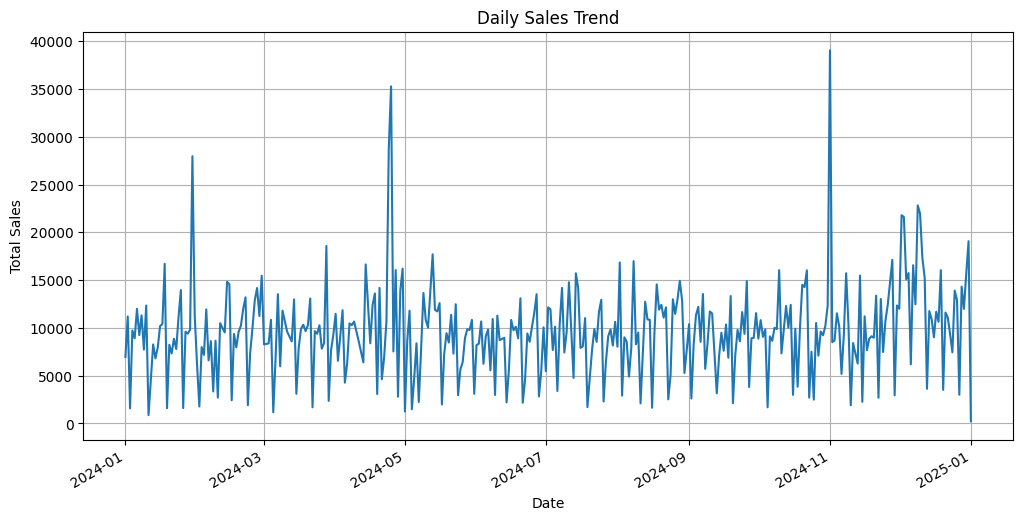

In [11]:
import matplotlib.pyplot as plt

# Grouping data by date and summing the sales
daily_sales = df_2024.groupby('◊™◊ê◊®◊ô◊ö')['◊ê◊ó◊®◊ô ◊î◊†◊ó◊î'].sum()

# Plotting the trend over time
plt.figure(figsize=(12,6))
daily_sales.plot(kind='line')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

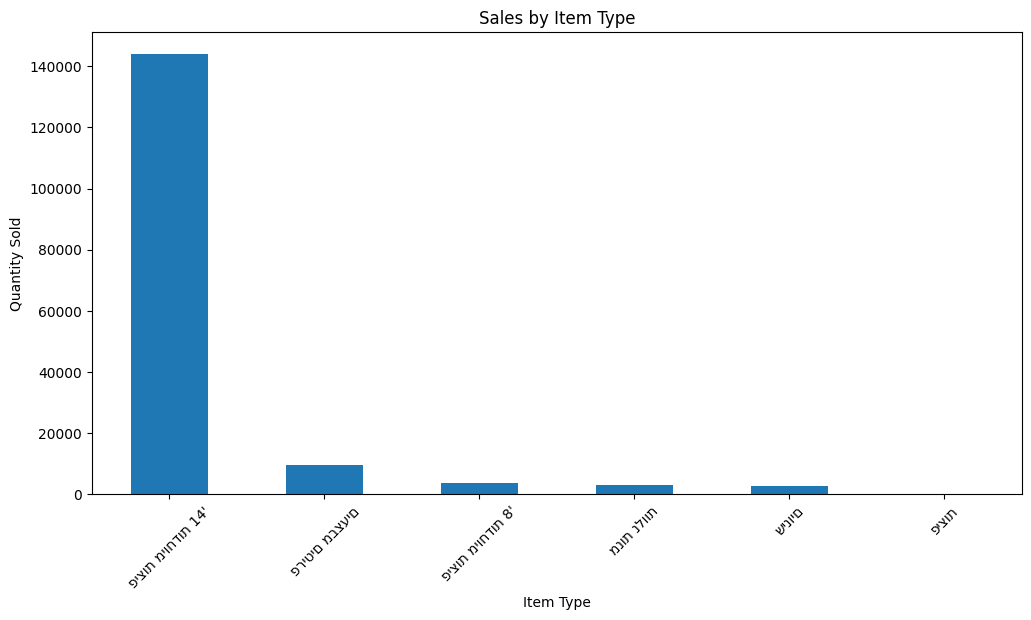

In [12]:
# Grouping by item type and summing quantities sold
item_sales = df_2024.groupby('◊™◊ê◊ï◊® ◊°◊ï◊í')['◊õ◊û◊ï◊™'].sum().sort_values(ascending=False)

# Plotting the top item categories
plt.figure(figsize=(12,6))
item_sales.plot(kind='bar')
plt.title('Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

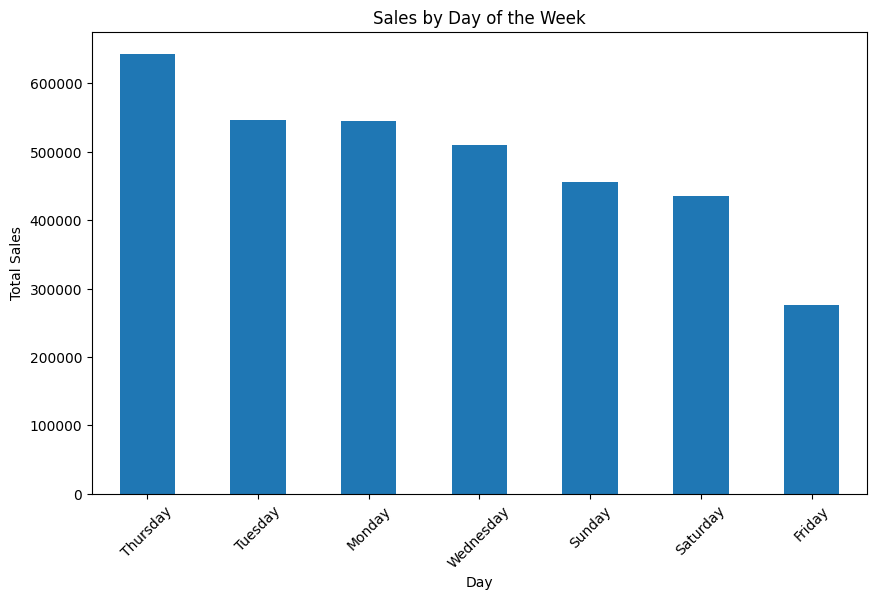

In [13]:
# Grouping by day of the week and summing sales
day_sales = df_2024.groupby('Day_of_Week')['◊ê◊ó◊®◊ô ◊î◊†◊ó◊î'].sum().sort_values(ascending=False)

# Plotting sales by day of the week
plt.figure(figsize=(10,6))
day_sales.plot(kind='bar')
plt.title('Sales by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

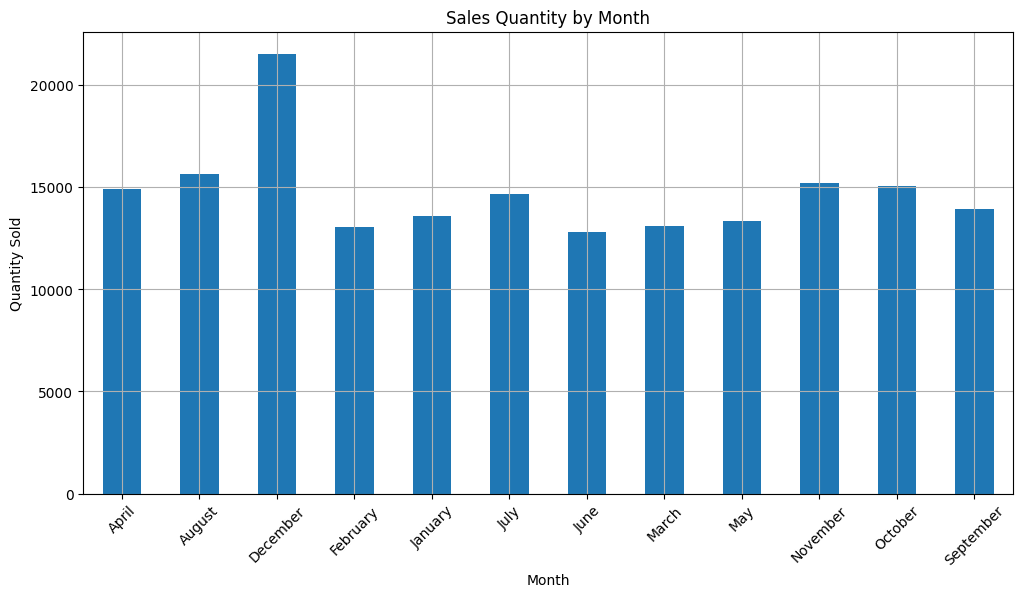

In [14]:
import matplotlib.pyplot as plt

# Grouping by month and summing the quantity sold
monthly_sales = df_2024.groupby(df_2024['◊™◊ê◊®◊ô◊ö'].dt.month_name())['◊õ◊û◊ï◊™'].sum().sort_index()

# Plotting the sales by month
plt.figure(figsize=(12,6))
monthly_sales.plot(kind='bar')
plt.title('Sales Quantity by Month')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [15]:
# Grouping by '◊î◊ñ◊û◊†◊î' and aggregating the items ordered in each order
# Combining the item descriptions into a single string for each order
df_grouped = df_2024.groupby('◊î◊ñ◊û◊†◊î').agg({
    '◊™◊ê◊®◊ô◊ö': 'first',  # Keeping the first date for each order
    '◊™◊ê◊ï◊® ◊°◊ï◊í': lambda x: ', '.join(x.dropna().unique()),  # Combining unique item types into a string
    '◊™◊ê◊ï◊® ◊§◊®◊ô◊ò': lambda x: ', '.join(x.dropna().unique()), # Combining unique item descriptions
    '◊õ◊û◊ï◊™': 'sum',  # Summing quantities for each order
    '◊°◊õ◊ï◊ù': 'sum',  # Summing the total amount for each order
    '◊î◊†◊ó◊î ◊ú◊§◊®◊ô◊ò': 'sum',  # Summing the total discount
    '◊ê◊ó◊®◊ô ◊î◊†◊ó◊î': 'sum'  # Summing the total amount after discount
}).reset_index()

# Display the grouped data
df_grouped.head()

◊î◊ñ◊û◊†◊î      ◊™◊ê◊®◊ô◊ö                          ◊™◊ê◊ï◊® ◊°◊ï◊í  \
0  7636259 2024-01-01                 ◊§◊ô◊¶◊ï◊™ ◊û◊ô◊ï◊ó◊ì◊ï◊™ 14'   
1  7636260 2024-01-01                  ◊§◊ô◊¶◊ï◊™ ◊û◊ô◊ï◊ó◊ì◊ï◊™ 8'   
2  7636261 2024-01-01  ◊§◊ô◊¶◊ï◊™ ◊û◊ô◊ï◊ó◊ì◊ï◊™ 14', ◊§◊®◊ô◊ò◊ô◊ù ◊û◊ë◊¶◊¢◊ô◊ù   
3  7636262 2024-01-01                 ◊§◊ô◊¶◊ï◊™ ◊û◊ô◊ï◊ó◊ì◊ï◊™ 14'   
4  7636263 2024-01-01                 ◊§◊ô◊¶◊ï◊™ ◊û◊ô◊ï◊ó◊ì◊ï◊™ 14'   

                                           ◊™◊ê◊ï◊® ◊§◊®◊ô◊ò  ◊õ◊û◊ï◊™   ◊°◊õ◊ï◊ù  ◊î◊†◊ó◊î ◊ú◊§◊®◊ô◊ò  \
0                                      ◊û◊®◊í◊®◊ô◊ò◊î 8' []     1  30.90           0   
1     ◊ñ◊ô◊™◊ô◊ù ◊ô◊®◊ï◊ß◊ô◊ù ◊ó◊¶◊ô ◊ô◊û◊ô◊ü, ◊§◊ê◊§◊ê ◊ß◊®◊ê◊°◊ò ◊ß◊ú◊ê◊°◊ô 14' []     2  88.85           0   
2  ◊™◊ô◊®◊°, ◊™◊ï◊°◊§◊™ ◊í◊ë◊ô◊†◊î, ◊¢◊í◊ë◊†◊ô◊ï◊™, ◊ê◊®◊ï◊ó◊™ ◊ô◊ú◊ì◊ô◊ù, ◊ß◊ú◊ê◊°◊ô...     8  59.00           0   
3                                       ◊ß◊ú◊ê◊°◊ô◊™ 8' []     1  30.90           0   
4              ◊§◊ô◊ï◊ñ ◊ò◊ô ◊ê◊§◊®◊°◊ß 1.5 ◊ú◊ô◊ò◊®, ◊ß◊ú◊ê◊°◊ô◊™ 16' []     2  97.70           0   

   ◊ê◊ó◊®◊ô ◊î◊†◊ó◊î  
0      30.90  
1      88.85  
2      59.00  
3      30.90  
4      97.70

In [16]:
# Converting the date column to datetime format and extracting useful features
df_grouped['◊™◊ê◊®◊ô◊ö'] = pd.to_datetime(df_grouped['◊™◊ê◊®◊ô◊ö'], dayfirst=True)  # Ensure date format is correct
df_grouped['Day_of_Week'] = df_grouped['◊™◊ê◊®◊ô◊ö'].dt.day_name()  # Extract day of the week
df_grouped['Month_Name'] = df_grouped['◊™◊ê◊®◊ô◊ö'].dt.month_name()  # Extract month name
df_grouped['Week_of_Year'] = df_grouped['◊™◊ê◊®◊ô◊ö'].dt.isocalendar().week  # Week of the year

In [17]:
df_grouped

◊î◊ñ◊û◊†◊î      ◊™◊ê◊®◊ô◊ö                          ◊™◊ê◊ï◊® ◊°◊ï◊í  \
0      7636259 2024-01-01                 ◊§◊ô◊¶◊ï◊™ ◊û◊ô◊ï◊ó◊ì◊ï◊™ 14'   
1      7636260 2024-01-01                  ◊§◊ô◊¶◊ï◊™ ◊û◊ô◊ï◊ó◊ì◊ï◊™ 8'   
2      7636261 2024-01-01  ◊§◊ô◊¶◊ï◊™ ◊û◊ô◊ï◊ó◊ì◊ï◊™ 14', ◊§◊®◊ô◊ò◊ô◊ù ◊û◊ë◊¶◊¢◊ô◊ù   
3      7636262 2024-01-01                 ◊§◊ô◊¶◊ï◊™ ◊û◊ô◊ï◊ó◊ì◊ï◊™ 14'   
4      7636263 2024-01-01                 ◊§◊ô◊¶◊ï◊™ ◊û◊ô◊ï◊ó◊ì◊ï◊™ 14'   
...        ...        ...                               ...   
32741  7669629 2025-01-01                 ◊§◊ô◊¶◊ï◊™ ◊û◊ô◊ï◊ó◊ì◊ï◊™ 14'   
32742  7669630 2025-01-01  ◊§◊ô◊¶◊ï◊™ ◊û◊ô◊ï◊ó◊ì◊ï◊™ 14', ◊§◊®◊ô◊ò◊ô◊ù ◊û◊ë◊¶◊¢◊ô◊ù   
32743  7669631 2025-01-01                 ◊§◊ô◊¶◊ï◊™ ◊û◊ô◊ï◊ó◊ì◊ï◊™ 14'   
32744  7669632 2024-12-31                                     
32745  7669633 2024-12-31                        ◊û◊†◊ï◊™ ◊†◊ú◊ï◊ï◊™   

                                               ◊™◊ê◊ï◊® ◊§◊®◊ô◊ò  ◊õ◊û◊ï◊™     ◊°◊õ◊ï◊ù  \
0                                          ◊û◊®◊í◊®◊ô◊ò◊î 8' []     1    30.90   
1         ◊ñ◊ô◊™◊ô◊ù ◊ô◊®◊ï◊ß◊ô◊ù ◊ó◊¶◊ô ◊ô◊û◊ô◊ü, ◊§◊ê◊§◊ê ◊ß◊®◊ê◊°◊ò ◊ß◊ú◊ê◊°◊ô 14' []     2    88.85   
2      ◊™◊ô◊®◊°, ◊™◊ï◊°◊§◊™ ◊í◊ë◊ô◊†◊î, ◊¢◊í◊ë◊†◊ô◊ï◊™, ◊ê◊®◊ï◊ó◊™ ◊ô◊ú◊ì◊ô◊ù, ◊ß◊ú◊ê◊°◊ô...     8    59.00   
3                                           ◊ß◊ú◊ê◊°◊ô◊™ 8' []     1    30.90   
4                  ◊§◊ô◊ï◊ñ ◊ò◊ô ◊ê◊§◊®◊°◊ß 1.5 ◊ú◊ô◊ò◊®, ◊ß◊ú◊ê◊°◊ô◊™ 16' []     2    97.70   
...                                                  ...   ...      ...   
32741  ◊®◊ï◊ò◊ë ◊©◊ï◊ù ◊§◊®◊û◊ñ◊ü ◊í◊ì◊ï◊ú, ◊ú◊ú◊ê ◊û◊©◊ï◊ú◊©◊ô◊ù, ◊§◊ô◊¶◊ï◊™ ◊û◊ô◊ï◊ó◊ì◊ï...     6   112.70   
32742  ◊ß◊ï◊ß◊î ◊ß◊ï◊ú◊î 1.5 ◊ú◊ô◊ò◊®, ◊©◊ß◊ô◊™ ◊ú◊ß◊ï◊ó, ◊§◊ò◊®◊ô◊ï◊™, ◊ß◊ú◊ê◊°◊ô◊™ ...     6    85.35   
32743                         ◊ú◊ú◊ê ◊û◊©◊ï◊ú◊©◊ô◊ù, ◊û◊®◊í◊®◊ô◊ò◊î 8' []     3    34.90   
32744  ◊ß◊ú◊ê◊°◊ô◊™ 14'+ ◊™◊ï◊° BM, ◊§◊ô◊¶◊î ◊ê◊ô◊©◊ô◊™ + ◊™◊ï◊°  XTRA, ◊ß◊ú...    45  4013.20   
32745  ◊©◊ï◊ë◊® 100 ◊©◊ó DV, ◊©◊ï◊ë◊® 50 ◊©◊ó DV, 2 ◊û◊©◊§◊ó◊™◊ô◊ï◊™ ◊ß◊ú◊ê◊°...     9   589.00   

       ◊î◊†◊ó◊î ◊ú◊§◊®◊ô◊ò  ◊ê◊ó◊®◊ô ◊î◊†◊ó◊î Day_of_Week Month_Name  Week_of_Year  
0               0      30.90      Monday    January             1  
1               0      88.85      Monday    January             1  
2               0      59.00      Monday    January             1  
3               0      30.90      Monday    January             1  
4               0      97.70      Monday    January             1  
...           ...        ...         ...        ...           ...  
32741           0     112.70   Wednesday    January             1  
32742           0      85.35   Wednesday    January             1  
32743           0      34.90   Wednesday    January             1  
32744           0    4013.20     Tuesday   December             1  
32745           0     589.00     Tuesday   December             1  

[32746 rows x 11 columns]

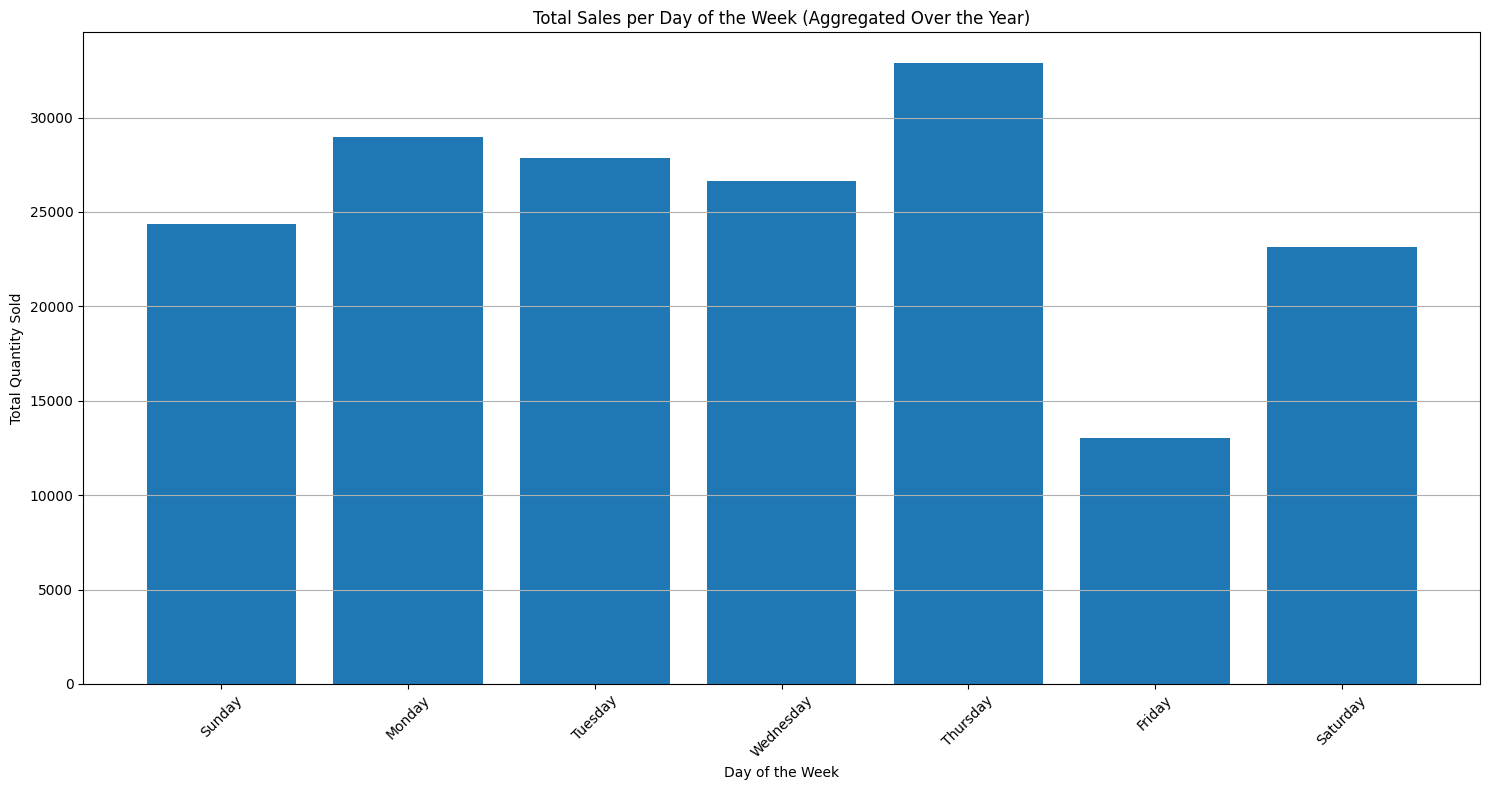

In [18]:
import matplotlib.pyplot as plt

# Ensure the date column is in datetime format and extract the day of the week
df_grouped['Day_of_Week'] = df_grouped['◊™◊ê◊®◊ô◊ö'].dt.day_name()

# Defining the order of the days of the week for proper sorting
day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# Grouping sales data by day of the week and summing across the entire year
weekly_aggregate_sales = df_grouped.groupby('Day_of_Week')['◊õ◊û◊ï◊™'].sum().reindex(day_order)

# Plotting the total sales for each day of the week aggregated over the year
plt.figure(figsize=(15, 8))
plt.bar(weekly_aggregate_sales.index, weekly_aggregate_sales.values)

# Customizing the plot
plt.title('Total Sales per Day of the Week (Aggregated Over the Year)')
plt.xlabel('Day of the Week')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

ValueError: The number of FixedLocator locations (13), usually from a call to set_ticks, does not match the number of labels (12).

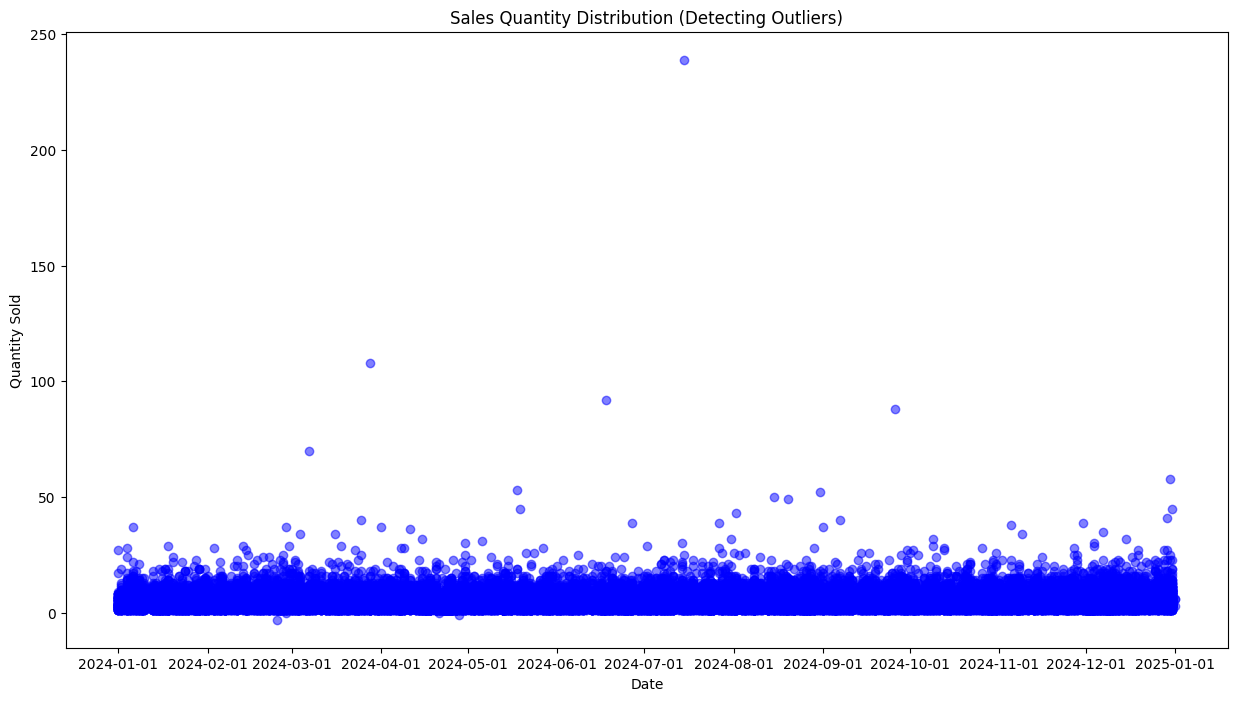

In [20]:
import matplotlib.pyplot as plt

# Sorting data by date to ensure chronological order
df_grouped = df_grouped.sort_values('◊™◊ê◊®◊ô◊ö')

# Scatter plot to visualize outliers in sales quantity per order
plt.figure(figsize=(15, 8))
plt.scatter(df_grouped['◊™◊ê◊®◊ô◊ö'], df_grouped['◊õ◊û◊ï◊™'], alpha=0.5, c='blue')

# Customizing the plot to show all months on X-axis
plt.title('Sales Quantity Distribution (Detecting Outliers)')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')

# Setting the ticks for all months
plt.xticks(df_grouped['◊™◊ê◊®◊ô◊ö'].dt.to_period("M").drop_duplicates().dt.start_time,
           df_grouped['◊™◊ê◊®◊ô◊ö'].dt.strftime('%B').unique(), rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for sales quantity per month
plt.figure(figsize=(15, 8))
sns.boxplot(x='Month_Name', y='◊õ◊û◊ï◊™', data=df_grouped, order=[
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
])

# Customizing the plot
plt.title('Box Plot of Sales Quantity by Month')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Creating a pivot table where rows are months and columns are days of the week
monthly_weekly_sales = df_grouped.pivot_table(
    values='◊õ◊û◊ï◊™',
    index=df_grouped['◊™◊ê◊®◊ô◊ö'].dt.month_name(),
    columns=df_grouped['◊™◊ê◊®◊ô◊ö'].dt.day_name(),
    aggfunc='sum',
    fill_value=0
)

In [ ]:
# Defining the correct order for months and days of the week
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]
day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# Reindexing to ensure all months and days are included, even if data is missing
monthly_weekly_sales = monthly_weekly_sales.reindex(index=month_order, columns=day_order, fill_value=0)
monthly_weekly_sales

In [ ]:
# Reset the index to move months from the index to a column
monthly_weekly_sales = monthly_weekly_sales.reset_index()

# Rename the new column (if needed)
monthly_weekly_sales.rename(columns={'index': 'Month'}, inplace=True)

# Perform one-hot encoding for the '◊™◊ê◊®◊ô◊ö' column
monthly_weekly_sales = pd.get_dummies(monthly_weekly_sales, columns=['◊™◊ê◊®◊ô◊ö'], prefix='', prefix_sep='')

# Display the updated table
monthly_weekly_sales

In [ ]:
# ◊®◊©◊ô◊û◊™ ◊©◊û◊ï◊™ ◊î◊ó◊ï◊ì◊©◊ô◊ù ◊ú◊§◊ô ◊°◊ì◊®
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

# ◊©◊ô◊†◊ï◊ô ◊î◊ê◊ô◊†◊ì◊ß◊° ◊ú◊©◊û◊ï◊™ ◊î◊ó◊ï◊ì◊©◊ô◊ù
monthly_weekly_sales.index = month_order

# ◊ë◊ì◊ô◊ß◊î ◊ê◊ù ◊î◊õ◊ú ◊™◊ß◊ô◊ü
monthly_weekly_sales # ◊ú◊®◊ê◊ï◊™ ◊©◊î◊™◊ï◊¶◊ê◊î ◊†◊õ◊ï◊†◊î

In [ ]:
correlation_matrix = monthly_weekly_sales.corr()

In [ ]:
# Define the columns for days of the week (Sunday to Saturday)
day_columns = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix.loc[['January', 'February', 'March', 'April', 'May', 'June',
                            'July', 'August', 'September', 'October', 'November', 'December'], day_columns],  # Ensure correct slicing
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    cbar=True
)

# Add titles and labels
plt.title('Correlation Between Months and Days of the Week', fontsize=14)
plt.xlabel('Days of the Week', fontsize=12)
plt.ylabel('Months', fontsize=12)

# Rotate X-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()